## STEP 0: LIBRARIES IMPORT




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## STEP 1: IMPORT DATASET

In [ ]:
dataa = pd.read_excel(r"E:\Spring 2024\DAP391m\Filtered_Book_Data.xlsx")

In [ ]:
dataa.head()

,Product Name,Company,Category,Sale Off (%),Price,Rating Stars,Sold,Review,Location
0,Kim Đồng - Anime Comics - One Piece Stampede -...,Kim Đồng,Truyện Tranh,10,69300,0,11,0,Hà Nội
1,Sách - Sword Art Online - 10,IPM Việt Nam,Truyện Tranh,20,76000,5,16,3,Hà Nội
2,Hananoi Và Triệu Chứng Tình Yêu - Tập 9 - Megu...,Nhà Xuất Bản Trẻ,Truyện Tranh,10,36000,0,0,0,Bà Rịa Vũng Tàu
3,Truyện Tranh - Nhóc Miko! Cô bé nhí nhảnh 27,Nhà Xuất Bản Trẻ,Truyện Tranh,10,22500,4,97,17,Đà Nẵng
4,Truyện Ma Không Hồi Kết,AZ Việt Nam,Sách Văn Học,0,169000,5,0,1,Hồ Chí Minh


In [ ]:
dataa.tail()

,Product Name,Company,Category,Sale Off (%),Price,Rating Stars,Sold,Review,Location
5800,Truyện tranh NXB Trẻ - Black Jack 06 (Bìa cứng),Nhà Xuất Bản Trẻ,Truyện Tranh,9,122500,5,7,1,Đà Nẵng
5801,Sách - Combo Thám tử lừng danh Conan - 6 quyển...,Kim Đồng,Truyện Tranh,0,160000,0,0,0,Nam Định
5802,Truyện tranh Mỹ vị Hầm ngục - Tập 5 - Bản phổ ...,IPM Việt Nam,Truyện Tranh,0,70000,5,0,2,Hà Nội
5803,Kim Đồng - Nyankees - Bầy mèo bất hảo - Tập 5 ...,Kim Đồng,Truyện Tranh,10,27000,0,8,0,Hà Nội
5804,Kim Đồng -Doraemon Plus - Tập 2,Kim Đồng,Truyện Tranh,10,19800,0,6,0,Hà Nội


In [ ]:
dataa.shape

(5805, 9)

In [ ]:
column_names = dataa.columns
print(column_names)

Index(['Product Name', 'Company', 'Category', 'Sale Off (%)', 'Price',
       'Rating Stars', 'Sold', 'Review', 'Location'],
      dtype='object')


In [ ]:
dataa.isnull().sum()

Product Name    0
Company         0
Category        0
Sale Off (%)    0
Price           0
Rating Stars    0
Sold            0
Review          0
Location        0
dtype: int64

In [ ]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  5805 non-null   object
 1   Company       5805 non-null   object
 2   Category      5805 non-null   object
 3   Sale Off (%)  5805 non-null   int64 
 4   Price         5805 non-null   int64 
 5   Rating Stars  5805 non-null   int64 
 6   Sold          5805 non-null   int64 
 7   Review        5805 non-null   int64 
 8   Location      5805 non-null   object
dtypes: int64(5), object(4)
memory usage: 408.3+ KB


In [ ]:
dataa = dataa.drop(['Product Name'] , axis=1)
dataa.head()

,Company,Category,Sale Off (%),Price,Rating Stars,Sold,Review,Location
0,Kim Đồng,Truyện Tranh,10,69300,0,11,0,Hà Nội
1,IPM Việt Nam,Truyện Tranh,20,76000,5,16,3,Hà Nội
2,Nhà Xuất Bản Trẻ,Truyện Tranh,10,36000,0,0,0,Bà Rịa Vũng Tàu
3,Nhà Xuất Bản Trẻ,Truyện Tranh,10,22500,4,97,17,Đà Nẵng
4,AZ Việt Nam,Sách Văn Học,0,169000,5,0,1,Hồ Chí Minh


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_convert = LabelEncoder()

# Assuming you have your data in a DataFrame named 'dataa'
dataa['Company Label'] = label_convert.fit_transform(dataa['Company'])

dataa['Category Label'] = label_convert.fit_transform(dataa['Category'])

dataa['Location'] = label_convert.fit_transform(dataa['Location'])


# Print the DataFrame after encoding
print(dataa.head(10))

            Company      Category  Sale Off (%)   Price  Rating Stars  Sold  \
0          Kim Đồng  Truyện Tranh            10   69300             0    11   
1      IPM Việt Nam  Truyện Tranh            20   76000             5    16   
2  Nhà Xuất Bản Trẻ  Truyện Tranh            10   36000             0     0   
3  Nhà Xuất Bản Trẻ  Truyện Tranh            10   22500             4    97   
4       AZ Việt Nam  Sách Văn Học             0  169000             5     0   
5              AMAK  Truyện Tranh            15   75650             5     6   
6              AMAK  Truyện Tranh             2   93000             5    19   
7          Kim Đồng  Truyện Tranh            10   34200             5   142   
8          Kim Đồng  Truyện Tranh            10  108000             4    35   
9          Kim Đồng  Truyện Tranh            10   27000             5     8   

   Review  Location  Company Label  Category Label  
0       0         4              3               4  
1       3         4     

In [ ]:
new_data = dataa.loc[:, ['Company Label', 'Category Label', 'Sale Off (%)', 'Price', 'Rating Stars', 'Sold', 'Review', 'Location']]

# Print the new DataFrame
print(new_data.head(10))

   Company Label  Category Label  Sale Off (%)   Price  Rating Stars  Sold  \
0              3               4            10   69300             0    11   
1              2               4            20   76000             5    16   
2              5               4            10   36000             0     0   
3              5               4            10   22500             4    97   
4              1               3             0  169000             5     0   
5              0               4            15   75650             5     6   
6              0               4             2   93000             5    19   
7              3               4            10   34200             5   142   
8              3               4            10  108000             4    35   
9              3               4            10   27000             5     8   

   Review  Location  
0       0         4  
1       3         4  
2       0         0  
3      17        10  
4       1         6  
5       1

## STEP 2: VISUALIZE DATASET

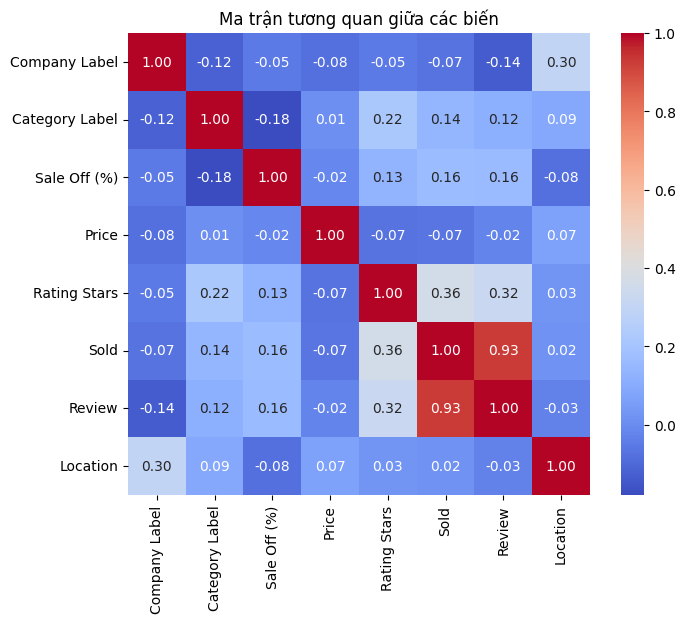

In [ ]:
correlation_matrix = new_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Ma trận tương quan giữa các biến')
plt.show()

Mối tương quan giữa 'Sold' và 'Review' khá là cao

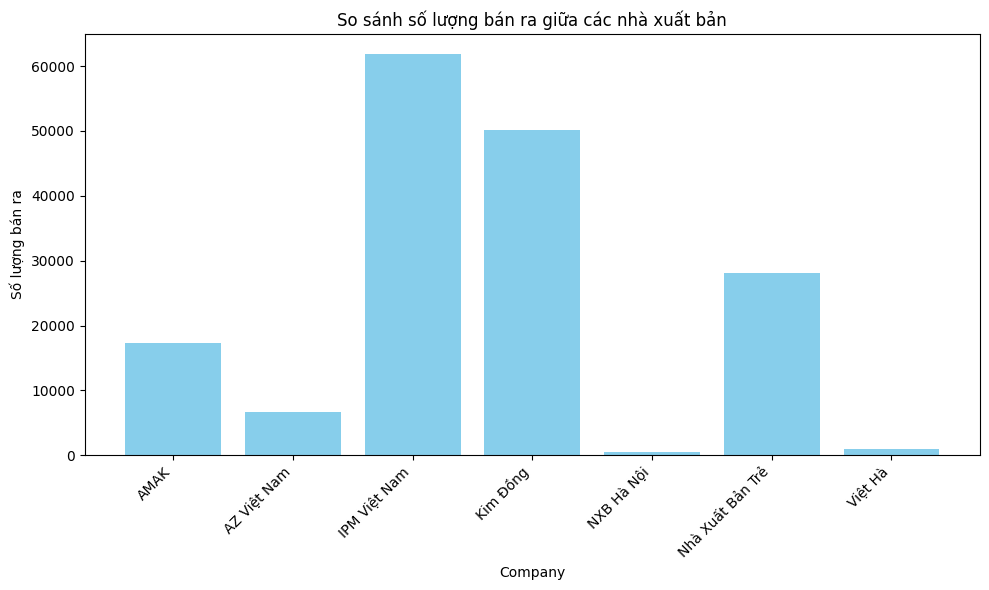

In [ ]:
# Sum of 'Sold' follow by 'Company'
company_sales = dataa.groupby('Company')['Sold'].sum().reset_index()

# Create chart
plt.figure(figsize=(10, 6))
plt.bar(company_sales['Company'], company_sales['Sold'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Số lượng bán ra')
plt.title('So sánh số lượng bán ra giữa các nhà xuất bản')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

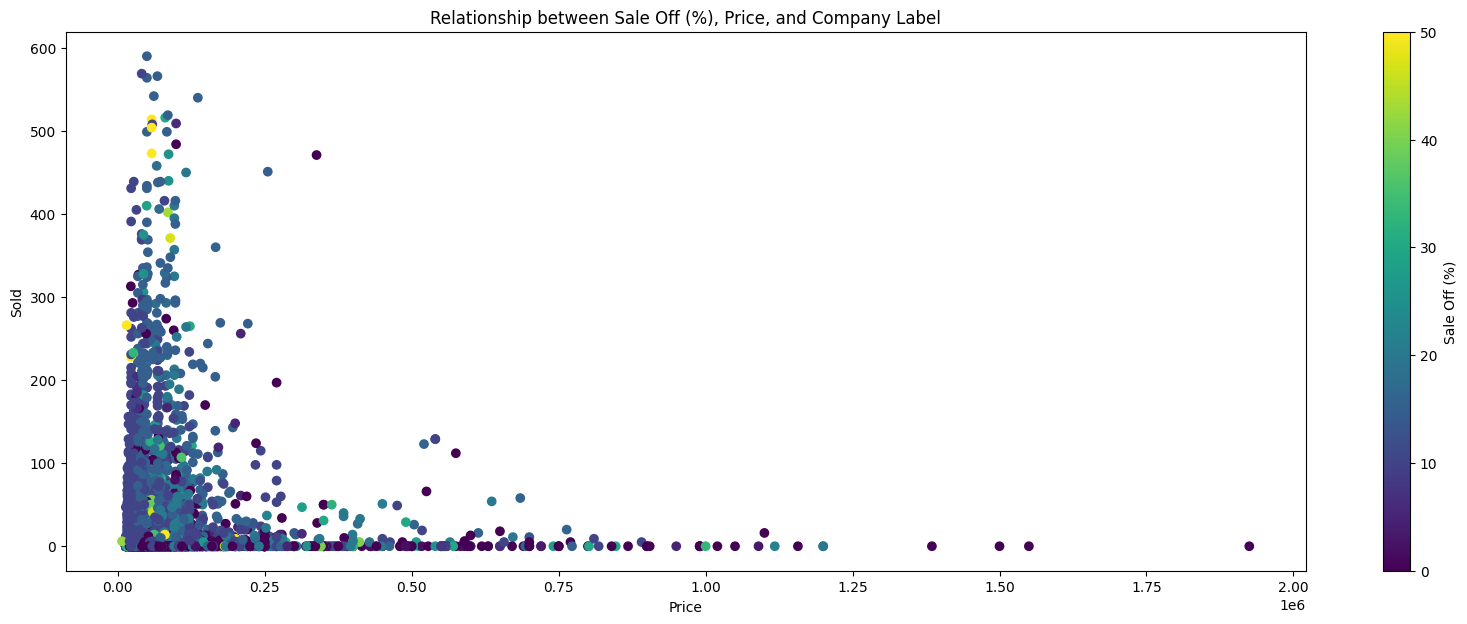

In [ ]:

# create scatter plot
plt.figure(figsize=(20, 7))
plt.scatter(new_data['Price'], new_data['Sold'], c=new_data['Sale Off (%)'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.title('Relationship between Sale Off (%), Price, and Company Label')
plt.colorbar(label='Sale Off (%)')
plt.show()

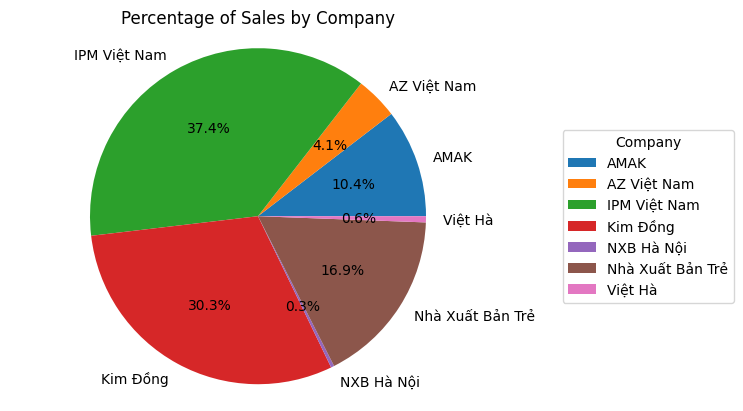

In [ ]:
# Calculate the total sales volume for each company
sales_by_company = dataa.groupby('Company')['Sold'].sum()

# pie chart
plt.pie(sales_by_company, labels=sales_by_company.index, autopct='%1.1f%%')
plt.title('Percentage of Sales by Company')
plt.axis('equal')

plt.legend(title='Company', loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.show()

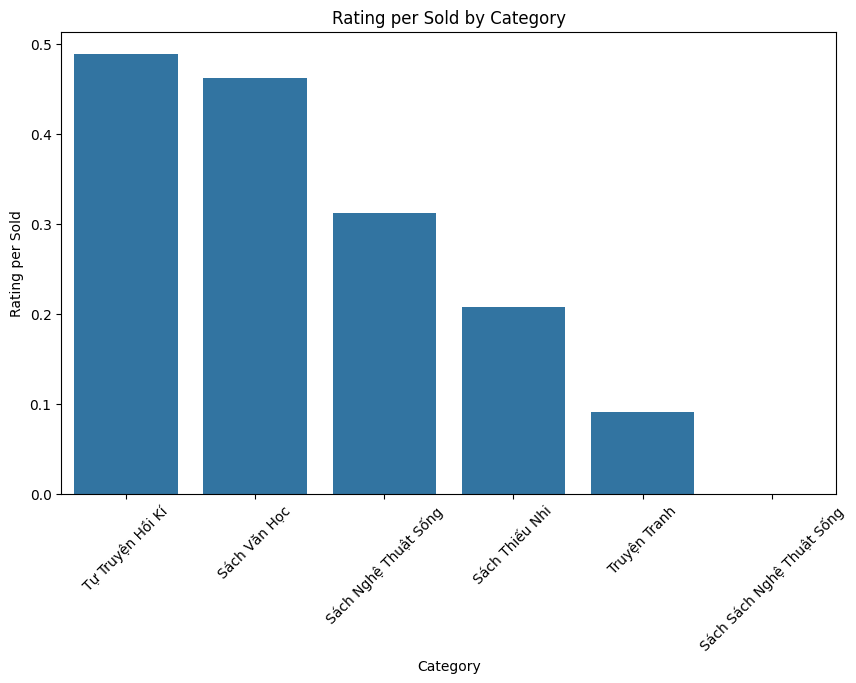

In [ ]:

# Calculate total Rating star and total sold for each category
category_totals = dataa.groupby('Category')[['Rating Stars', 'Sold']].sum()

# Calculate the Rating star/Total sold ratio for each category
category_totals['Rating_per_Sold'] = category_totals['Rating Stars'] / category_totals['Sold']

# Sort by Rating star/Total sold ratio in descending order
category_totals = category_totals.sort_values('Rating_per_Sold', ascending=False)

# Draw a column chart
plt.figure(figsize=(10, 6))
sns.barplot(data=category_totals, x=category_totals.index, y='Rating_per_Sold')
plt.xlabel('Category')
plt.ylabel('Rating per Sold')
plt.title('Rating per Sold by Category')
plt.xticks(rotation=45)

plt.show()

## STEP 3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

### 1. Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Choose target for predict
target_column_sold = 'Sold'
X = new_data.drop(columns=[target_column_sold])
y = new_data[target_column_sold]
# Split data
X_train_sold, X_test_sold, y_train_sold, y_test_sold = train_test_split(X, y, test_size=0.2, random_state=42)
# Choose linear regression to predict
linear_regression = LinearRegression()
linear_regression.fit(X_train_sold, y_train_sold)

# predict on test for 'Sold'
y_pred_test_sold_lr = linear_regression.predict(X_test_sold)
# predict on test for 'Train'
y_pred_train_sold_lr = linear_regression.predict(X_train_sold)

# evaluate model on test for sold

mse_test_sold = mean_squared_error(y_test_sold, y_pred_test_sold_lr)
r2_test_sold = r2_score(y_test_sold, y_pred_test_sold_lr)

# evaluate model on train for "Sold"
mse_train_sold = mean_squared_error(y_train_sold, y_pred_train_sold_lr)
r2_train_sold = r2_score(y_train_sold, y_pred_train_sold_lr)


print("Test Set Mean Squared Error for Sold:", mse_test_sold)
print("Test Set R-squared for Sold:", r2_test_sold)
print("Train Set Mean Squared Error for Sold:", mse_train_sold)
print("Train Set R-squared for tSold:", r2_train_sold)


Test Set Mean Squared Error for Sold: 478.55306993676976
Test Set R-squared for Sold: 0.8697558018478098
Train Set Mean Squared Error for Sold: 515.6838870604385
Train Set R-squared for tSold: 0.868673407533572


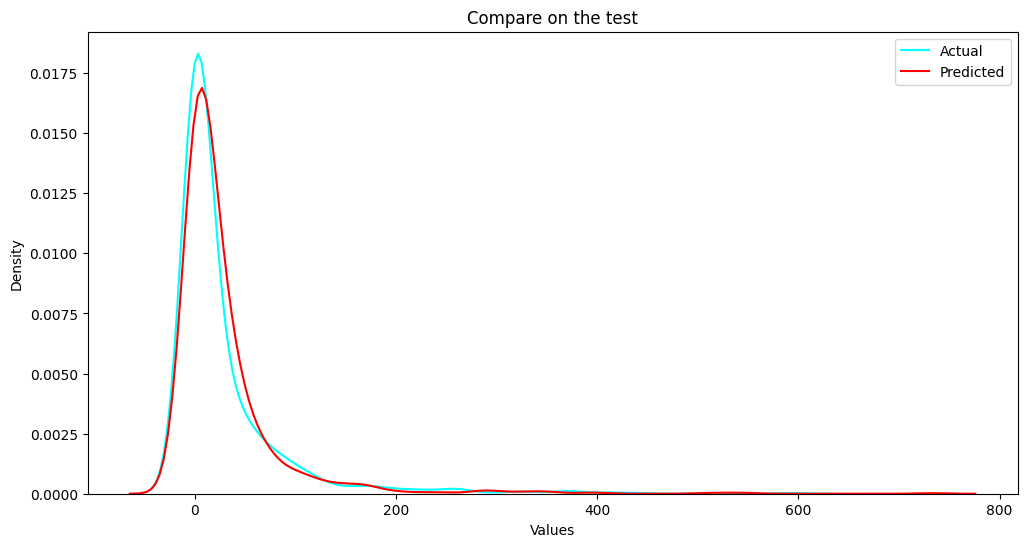

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot the distribution of actual and predicted values
sns.kdeplot(y_test_sold, label='Actual', color='cyan')
sns.kdeplot(y_pred_test_sold_lr, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the test')
plt.legend()
plt.show()

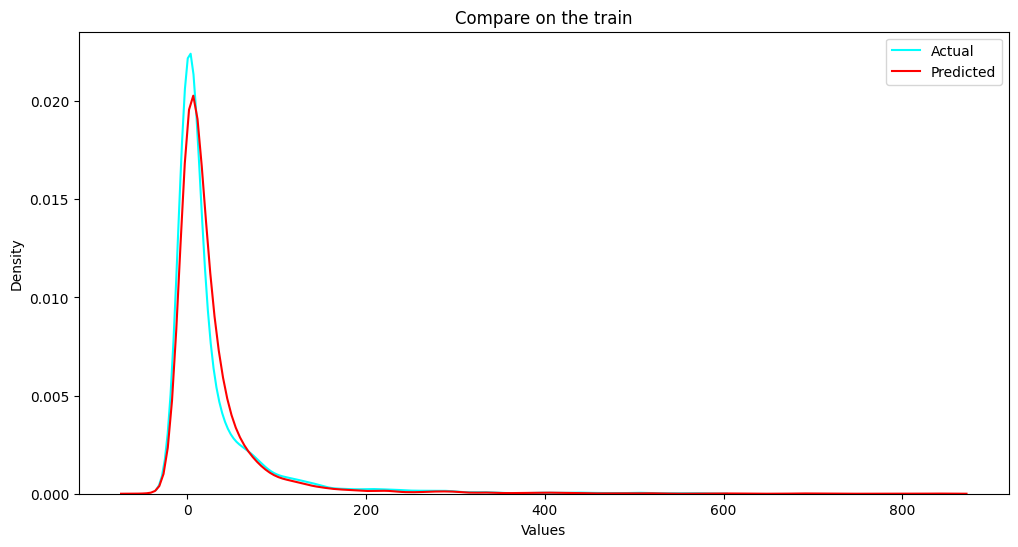

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot the distribution of actual and predicted values
sns.kdeplot(y_train_sold, label='Actual', color='cyan')
sns.kdeplot(y_pred_train_sold_lr, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the train')
plt.legend()
plt.show()

Với mô hình Linear Regression, hiệu suất của mô hình này tương đối cao. Giá trị dự đoán trên tập train và tập test khá là tương với giá trị thực tế trên tập train và tập test

### 2. Bayesian Ridge Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Choose target for predict
target_column_sold = 'Sold'
X = new_data.drop(columns=[target_column_sold])
y = new_data[target_column_sold]
# Split data
X_train_sold, X_test_sold, y_train_sold, y_test_sold = train_test_split(X, y, test_size=0.2, random_state=42)
# Choose linear regression to predict
model_pred = BayesianRidge()
model_pred.fit(X_train_sold, y_train_sold)

# predict on test for 'Sold'
y_pred_test_sold_bay = model_pred.predict(X_test_sold)
# predict on test for 'Train'
y_pred_train_sold_bay = model_pred.predict(X_train_sold)

# evaluate model on test for sold

mse_test_sold = mean_squared_error(y_test_sold, y_pred_test_sold_bay)
r2_test_sold = r2_score(y_test_sold, y_pred_test_sold_bay)

# evaluate model on train for "Sold"
mse_train_sold = mean_squared_error(y_train_sold, y_pred_train_sold_bay)
r2_train_sold = r2_score(y_train_sold, y_pred_train_sold_bay)


print("Test Set Mean Squared Error for Sold:", mse_test_sold)
print("Test Set R-squared for Sold:", r2_test_sold)
print("Train Set Mean Squared Error for Sold:", mse_train_sold)
print("Train Set R-squared for Sold:", r2_train_sold)




Test Set Mean Squared Error for Sold: 478.57606716318645
Test Set R-squared for Sold: 0.8697495428652591
Train Set Mean Squared Error for Sold: 515.7011511858733
Train Set R-squared for Sold: 0.8686690109665625


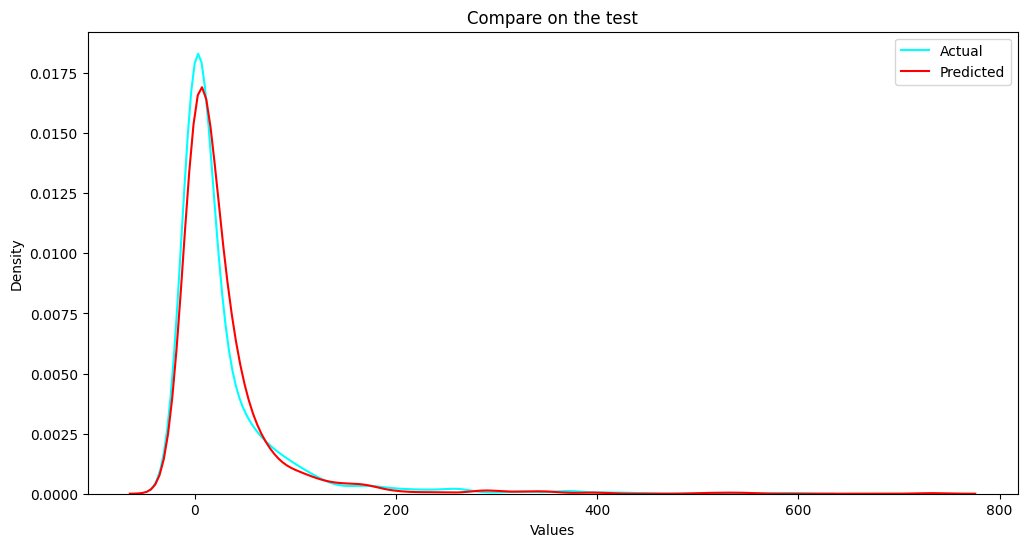

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot the distribution of actual and predicted values
sns.kdeplot(y_test_sold, label='Actual', color='cyan')
sns.kdeplot(y_pred_test_sold_bay, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the test')
plt.legend()

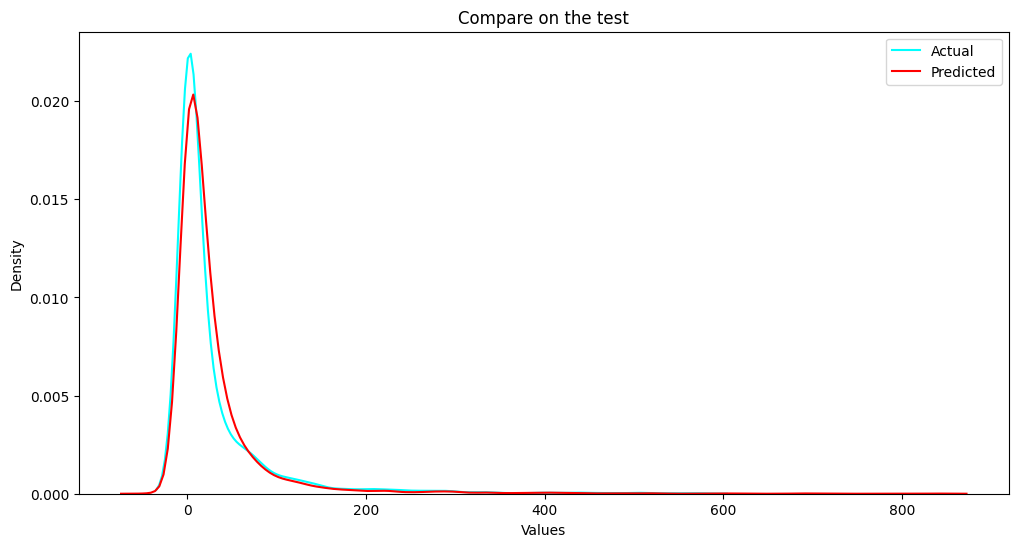

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot the distribution of actual and predicted values
sns.kdeplot(y_train_sold, label='Actual', color='cyan')
sns.kdeplot(y_pred_train_sold_bay, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the test')
plt.legend()

Mô hình Bayesian Ridge Regression cũng cho kết quả tương tự

### 3. Ridge Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Choose target for predict
target_column_sold = 'Sold'
X = new_data.drop(columns=[target_column_sold])
y = new_data[target_column_sold]
# Split data
X_train_sold, X_test_sold, y_train_sold, y_test_sold = train_test_split(X, y, test_size=0.2, random_state=42)
# Choose linear regression to predict
model_pred = Ridge()
model_pred.fit(X_train_sold, y_train_sold)

# predict on test for 'Sold'
y_pred_test_sold_rid = model_pred.predict(X_test_sold)
# predict on test for 'Train'
y_pred_train_sold_rid = model_pred.predict(X_train_sold)

# evaluate model on test for sold

mse_test_sold = mean_squared_error(y_test_sold, y_pred_test_sold_rid)
r2_test_sold = r2_score(y_test_sold, y_pred_test_sold_rid)

# evaluate model on train for "Sold"
mse_train_sold = mean_squared_error(y_train_sold, y_pred_train_sold_rid)
r2_train_sold = r2_score(y_train_sold, y_pred_train_sold_rid)


print("Test Set Mean Squared Error for Sold:", mse_test_sold)
print("Test Set R-squared for Sold:", r2_test_sold)
print("Train Set Mean Squared Error for Sold:", mse_train_sold)
print("Train Set R-squared for tSold:", r2_train_sold)



Test Set Mean Squared Error for Sold: 478.55311606530734
Test Set R-squared for Sold: 0.8697557892933518
Train Set Mean Squared Error for Sold: 515.6838882565681
Train Set R-squared for tSold: 0.8686734072289598


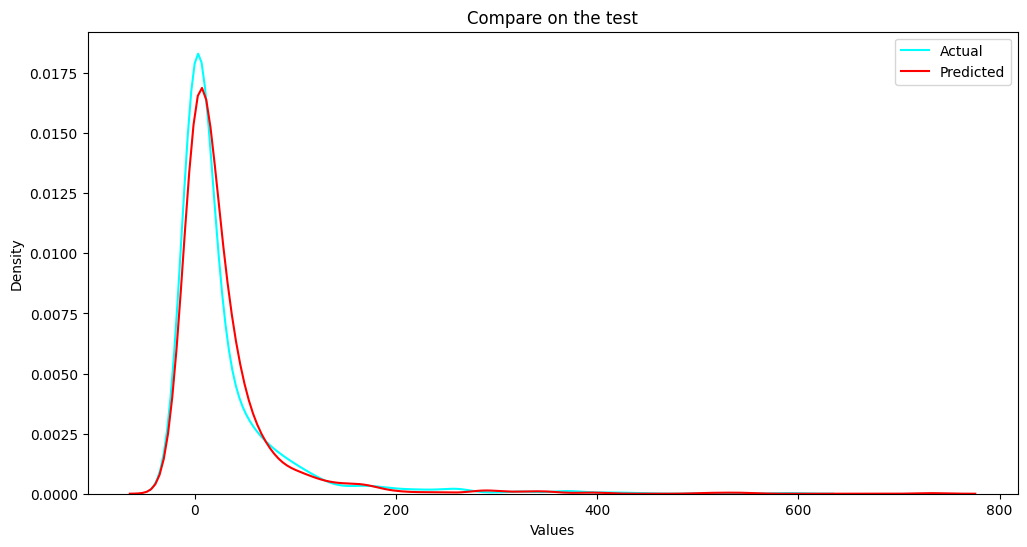

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot the distribution of actual and predicted values
sns.kdeplot(y_test_sold, label='Actual', color='cyan')
sns.kdeplot(y_pred_test_sold_rid, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the test')
plt.legend()

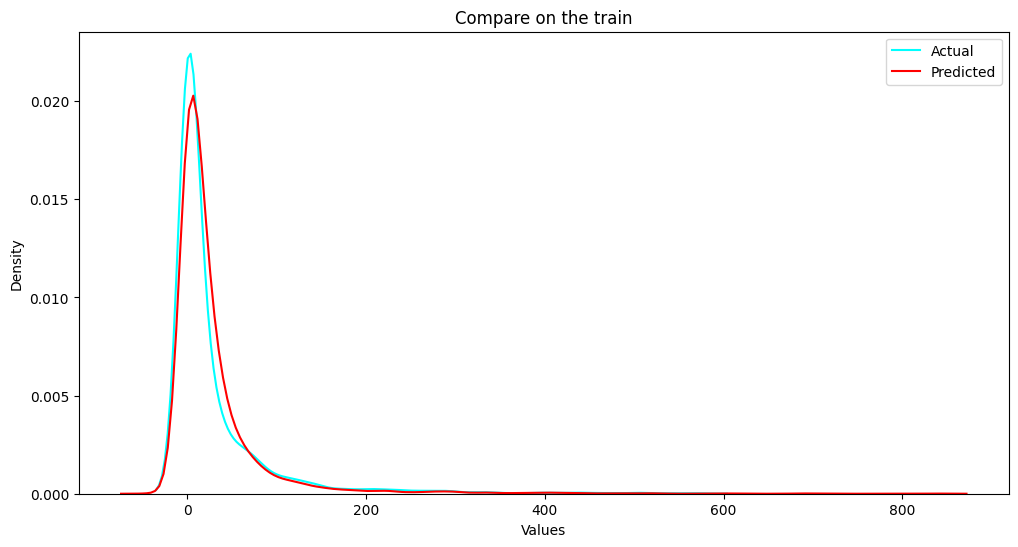

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Plot the distribution of actual and predicted values
sns.kdeplot(y_train_sold, label='Actual', color='cyan')
sns.kdeplot(y_pred_train_sold_rid, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the train')
plt.legend()

Mô hình Ridge Regression cũng cho kết quả tương tự

Trong quá trình thử nghiệm mô hình, nếu như ta loại bỏ cột 'Review' thì hiệu suất của mô hình giảm khá mạnh. Điều đó chứng tỏ cột 'Review' là cột chứa thông tin quan trọng, việc loại bỏ nó làm mất đi sự cân bằng dữ liệu hoặc là thiếu thông tin khi training mô hình

### STEP 4. IMPROVING THE MODEL

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



In [ ]:

min_train = X_train_sold.min()
print(min_train)

Company Label         0
Category Label        0
Sale Off (%)          0
Price             13500
Rating Stars          0
Review                0
Location              0
dtype: int64


In [ ]:
min_test = X_test_sold.min()
range_test = (X_test_sold - min_test).max()
X_test_scaled = (X_test_sold-min_test)/range_test

In [ ]:
range_train = (X_train_sold-min_train).max()
range_train

Company Label           6
Category Label          5
Sale Off (%)           50
Price             1911500
Rating Stars            5
Review                223
Location               10
dtype: int64

In [ ]:
X_train_scaled = (X_train_sold-min_train)/range_train
X_train_scaled

,Company Label,Category Label,Sale Off (%),Price,Rating Stars,Review,Location
3835,0.166667,0.8,0.22,0.053100,0.0,0.000000,0.6
4900,0.666667,0.4,0.52,0.023803,0.0,0.000000,0.4
3182,0.500000,0.8,0.20,0.004708,0.0,0.000000,0.4
4763,0.833333,0.8,0.20,0.035313,0.8,0.053812,1.0
3893,0.833333,0.8,0.00,0.017002,1.0,0.008969,0.4
...,...,...,...,...,...,...,...
3772,0.166667,0.8,0.38,0.017515,0.0,0.000000,0.4
5191,0.000000,0.8,0.00,0.021711,0.0,0.000000,0.4
5226,0.500000,0.8,0.02,0.013602,0.0,0.000000,0.4
5390,0.500000,0.4,0.20,0.000000,0.0,0.000000,0.4


In [ ]:
y_train_sold

3835      0
4900      0
3182      9
4763    138
3893      0
       ... 
3772      0
5191      0
5226      0
5390      0
860       0
Name: Sold, Length: 4644, dtype: int64

In [ ]:
y_test_sold

501      0
3162     7
3782     0
4274     0
4897     5
        ..
2980    28
2080    40
5583    31
4774    15
607      0
Name: Sold, Length: 1161, dtype: int64

In [ ]:
#define the model
model = LinearRegression()

In [ ]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}


In [ ]:
# Perform grid search cross-validation for hyperparameter optimization
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train_sold)


GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]})

In [ ]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
LinearRegression()


In [ ]:
# Fit the best model to the training data
best_model.fit(X_train_scaled, y_train_sold)

LinearRegression()

In [ ]:
# Evaluate the model on test data
grid_pred_train = best_model.predict(X_train_scaled)
grid_pred_test = best_model.predict(X_test_scaled)

In [ ]:
mse_test_sold = mean_squared_error(y_test_sold, grid_pred_test)
r2_test_sold  = r2_score(y_test_sold, grid_pred_test)
mse_train_sold = mean_squared_error(y_train_sold, grid_pred_train)
r2_train_sold = r2_score(y_train_sold, grid_pred_train)

print("Test Set Mean Squared Error for Sold:", mse_test_sold)
print("Test Set R-squared for Sold:", r2_test_sold)
print("Train Set Mean Squared Error for Sold:", mse_train_sold)
print("Train Set R-squared for Sold:", r2_train_sold)


Test Set Mean Squared Error for Sold: 616.0734651158925
Test Set R-squared for Sold: 0.8323279077961767
Train Set Mean Squared Error for Sold: 515.6838870604385
Train Set R-squared for Sold: 0.868673407533572


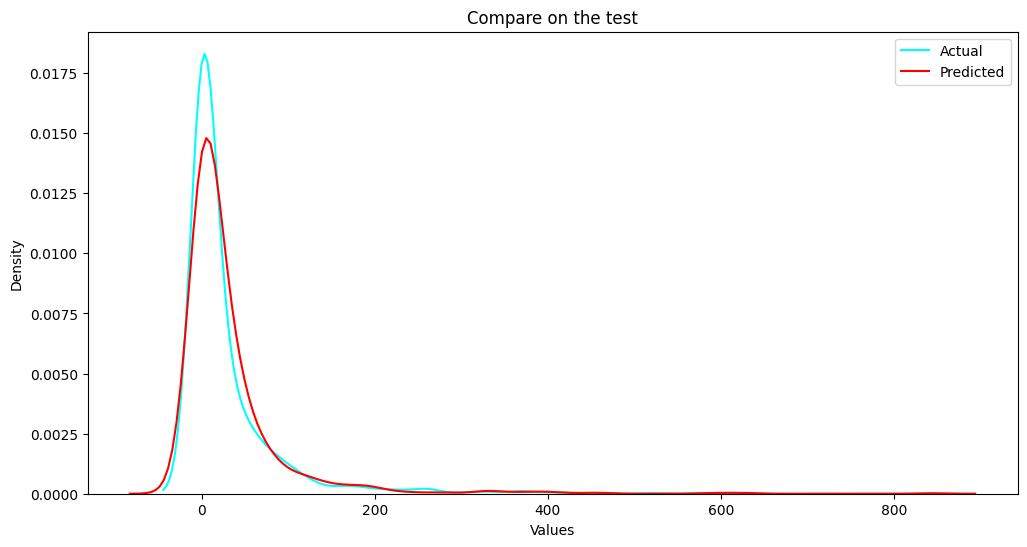

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Create chart for distributtion of Actual and Predicted
sns.kdeplot(y_test_sold, label='Actual', color='cyan')
sns.kdeplot(grid_pred_test, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the test')
plt.legend()

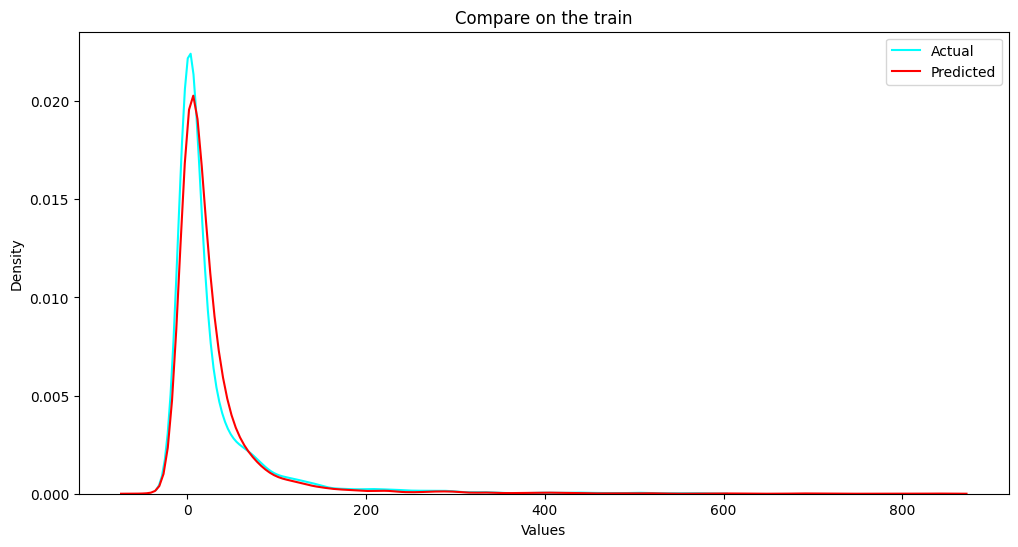

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Create chart for distributtion of Actual and Predicted
sns.kdeplot(y_train_sold, label='Actual', color='cyan')
sns.kdeplot(grid_pred_train, label='Predicted', color='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Compare on the train')
plt.legend()

##### Ta có thể thấy hiệu xuất của mô hình giảm một chút sau khi cải tiến. Nguyên nhân là do khi chuẩn hóa lại dữ liệu chưa tổng quát hóa được dữ liệu, hoặc là dữ liệu chưa đủ lớn dẫn đến hiệu suất của mô hình dự đoán giảm